#Assignment 1

##Introduction
It is requested to build a data-driven attacking corner kick session for Manchester City WFC against Chelsea FWC.

I decide to consider 2 aspects:
1. What are Manchester City's strengths in attacking corner kicks?
2. What are Chelsea's weaknesses in defending corner kicks?

In particular, I decide to structure my analysis around three key questions, repeated for different types of corners:
1. Who are Man City's most dangerous players from corner kicks? To determine who should be in the box waiting for the delivery.
2. Who are Man City's best corner kick takers? To decide who should take the corner.
3. What are Chelsea's most vulnerable areas when defending a corner kick? To decide where the corner should be directed. I believe that in a professional team it is always possible to find players who are comfortable attacking any area of the box, or to prepare schemes to do so, so I focus my analysis on exploiting Chelsea's weaknesses rather than Man City's strengths in this case.

The data we are told to use is StatsBomb's free **event data** of the **FA Women's Super League 2020/2021 season**, I obtain the data using the Python package statsbombpy.

##Explanations


I propose here a valid and complete corner kick session, but I am aware of the limitations of such an analysis:
- I have limited knowledge of the teams and the league being analysed, a better knowledge would certainly help to better interpret the data.
- I carry out the analysis as if I was preparing for a match, using data from the 2020/2021 season, so I assume that there have been no major changes in the teams studied since that season that could affect my analysis.
- The performance indices used are quite simple (e.g. more shots = better), the decision to keep it simple is based on personal conviction but also, on a lack of in-depth knowledge of the context and possible specific requirements of the staff.

##Imports and downloads

In [ ]:
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install mplsoccer

In [ ]:
import pandas as pd
from statsbombpy import sb
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from mplsoccer import VerticalPitch
from mplsoccer.pitch import Pitch
import numpy as np

##Manchester City's most dangerous players from corner kicks

I want to identify Manchester City's most dangerous players from corner kicks, to determine who should be waiting in and around the box for the delivery.

To do this, I decide to look at the actions that Statsbomb classifies as actions that came from a passage of play following a corner kick, rather than looking at the passes from corner kicks and the outcome of the delivery. In this way, I can also identify goals and shots that followed a corner kick but came after, for example, a challenge in the box or a short corner, which I think leads to slightly more significant results than just looking at shots and goals that came directly after a corner pass. In fact, a player who doesn't score directly from a corner kick, but from a challenge that follows the corner kick for example, should still be considered a threat from corner kicks.

I identify the Manchester City players who were involved in shots from corners, the number of shots, the goals they scored with their shots and the total xg of their shots.

In [ ]:
# get the event data of the season under study
event_data = sb.competition_events(
    country="England",
    division= "FA Women's Super League",
    season="2020/2021",
    gender="female"
)

In [ ]:
print(event_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443304 entries, 0 to 443303
Columns: 114 entries, 50_50 to under_pressure
dtypes: float64(6), int64(8), object(100)
memory usage: 385.6+ MB
None


In [ ]:
print(event_data.describe())

            duration          index      match_id         minute  \
count  330921.000000  443304.000000  4.433040e+05  443304.000000   
mean        1.254275    1705.107430  3.774558e+06      45.511076   
std         1.402463     998.524646  3.278094e+03      27.252404   
min         0.000000       1.000000  3.764230e+06       0.000000   
25%         0.195656     846.750000  3.775560e+06      22.000000   
50%         1.047877    1692.500000  3.775593e+06      45.000000   
75%         1.755574    2538.250000  3.775626e+06      69.000000   
max       158.659160    4152.000000  3.775659e+06     102.000000   

          pass_angle    pass_length  pass_recipient_id         period  \
count  121382.000000  121382.000000      112383.000000  443304.000000   
mean        0.005814      21.404725       18423.448511       1.496641   
std         1.526802      13.897764       12405.335293       0.499989   
min        -3.136667       0.000000        4633.000000       1.000000   
25%        -1.112720  

In [ ]:
# all the events with Manchester City in possession that came from a **passage of play** following a corner
corners_mancity_1 = event_data[(event_data['possession_team']=='Manchester City WFC') & (event_data['play_pattern']=='From Corner')].copy()

# player that shoot, outcome of the shoote and xg of the shoot
corner_dangerous_players = corners_mancity_1[['player', 'shot_outcome', 'shot_statsbomb_xg']][corners_mancity_1['type'] == 'Shot']

# transform shot outcome in 1 if goal, 0 otherwise
new_shotoutcome = [1 if x=='Goal' else 0 for x in corner_dangerous_players['shot_outcome'].tolist()]
corner_dangerous_players['shot_outcome'] = new_shotoutcome

# group by player, summing xg and total goals
corner_dangerous_players_copy = corner_dangerous_players.copy()
corner_dangerous_players = corner_dangerous_players.groupby('player').sum()

# group by players
corner_dangerous_players['goals/xg'] = corner_dangerous_players['shot_outcome']/corner_dangerous_players['shot_statsbomb_xg']

# get the number of shots of each player
corner_dangerous_players['n.shots'] = corner_dangerous_players_copy.groupby('player').count()['shot_outcome']

# renaming columns, sort by total goals scored
corner_dangerous_players.columns = ['goals', 'xg', 'goals/xg', 'n.shots']
corner_dangerous_players.sort_values(by='n.shots', ascending=False)

,goals,xg,goals/xg,n.shots
player,,,,
Lucy Bronze,1,1.097658,0.911031,12
Ellen White,2,1.807821,1.106304,11
Samantha June Mewis,3,1.188572,2.524037,11
Stephanie Houghton,1,1.173451,0.852187,10
Caroline Weir,0,0.635743,0.000000,8
Georgia Stanway,0,0.660676,0.000000,6
Janine Elizabeth Beckie,0,0.868892,0.000000,5
Lauren Hemp,1,0.787244,1.270254,5
Alex Greenwood,0,0.163225,0.000000,4


Ellen White and S.J.Mewis look like the most dangerous players as they both have a high number of shots, more than 1 goal and a good goals/xg ratio. Lucy Bronze and S.Houghton both have a high number of shots and a good goals/xg ratio, but only one goal. R.K.Lavelle has only 3 shots but a very high goals/xg ratio.

##Manchester City's best corner takers

I now want to identify Manchester City's best corner kick takers for different types of corners.
To do this, I will analyse all Manchester City passes from a corner kick and look at their outcome.
In particular, I will look at the ratio of positive corners (corner passes that ended in shots) / total corners taken of all Manchester City players who took at least one corner during the season, for six different situations identified by Statsbomb data:
1. Outswinging corner kicks from left corner (from the attacker's point of view).
2. Straight corners from left corner.
3. Inswinging corners from left corner.
4. Outswinging corners from right corner.
5. Straight corners from right corner.
6. Inswinging corners from right corner.


In [ ]:
# these are all the passes from corner
corners_mancity_2 = event_data[(event_data['possession_team']=='Manchester City WFC') & (event_data['pass_type']=='Corner')].copy()

# passes from corner
corner_dangerous_takers = corners_mancity_2[['player', 'pass_shot_assist', 'pass_goal_assist', 'location', 'pass_technique']]

# transform corner outcome in 1 if pass assisted a shot/goal, 0 otherwise
corner_dangerous_takers['pass_shot_assist'] = [1 if x==True else 0 for x in corner_dangerous_takers['pass_shot_assist'].tolist()]
corner_dangerous_takers['pass_goal_assist'] = [1 if x==True else 0 for x in corner_dangerous_takers['pass_goal_assist'].tolist()]

# calculate for each player the ratio #corners_resultedinshotorgoal/#corners_taken
corner_dangerous_takers['positive_corners'] = [1 if x==1 or y==1 else 0 for x,y in zip(corner_dangerous_takers['pass_shot_assist'].tolist(), corner_dangerous_takers['pass_goal_assist'].tolist())]
corner_dangerous_takers = corner_dangerous_takers[['player', 'positive_corners', 'location', 'pass_technique']]

# obtain the y location coordinate to filter on corners from the right or from the left
location_y = []
for i in corner_dangerous_takers['location'].tolist():

  location_y.append(i[1])

corner_dangerous_takers['location_y'] = location_y

<ipython-input-164-da90778cb741>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_dangerous_takers['pass_shot_assist'] = [1 if x==True else 0 for x in corner_dangerous_takers['pass_shot_assist'].tolist()]
<ipython-input-164-da90778cb741>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_dangerous_takers['pass_goal_assist'] = [1 if x==True else 0 for x in corner_dangerous_takers['pass_goal_assist'].tolist()]
<ipython-input-164-da90778cb741>:12: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
def get_corner_takers(corner_dangerous_takers, y_location, pass_technique):
  corner_dangerous_takers = corner_dangerous_takers[['player', 'positive_corners']][(corner_dangerous_takers['location_y']==y_location) & (corner_dangerous_takers['pass_technique']==pass_technique)]

  tot_corners = corner_dangerous_takers.groupby('player').count()
  pos_corners = corner_dangerous_takers.groupby('player').sum()
  ratio = corner_dangerous_takers.groupby('player').mean()

  corner_dangerous_takers_final = pd.merge(tot_corners, pos_corners, on='player', how='outer')
  corner_dangerous_takers_final = pd.merge(corner_dangerous_takers_final, ratio, on='player', how='outer')

  corner_dangerous_takers_final.columns = ['total corners', 'positive corners', 'ratio positive corners']
  corner_dangerous_takers_final = corner_dangerous_takers_final[['positive corners', 'total corners', 'ratio positive corners']]

  return corner_dangerous_takers_final.sort_values(by='positive corners', ascending=False)

###Left Outswinging corners

In [ ]:
get_corner_takers(corner_dangerous_takers, 0.1, 'Outswinging')

,positive corners,total corners,ratio positive corners
player,,,
Alex Greenwood,8,22,0.363636
Caroline Weir,2,7,0.285714


Alex Greenwood is clearly the best corner-taker in this situation, with more corners and a better ratio.

###Left Straight corners

In [ ]:
get_corner_takers(corner_dangerous_takers, 0.1, 'Straight')

,positive corners,total corners,ratio positive corners
player,,,
Alex Greenwood,2,7,0.285714


Alex Greenwood again, being the only one with data registered in this case.

###Left Inswinging corners

In [ ]:
get_corner_takers(corner_dangerous_takers, 0.1, 'Inswinging')

,positive corners,total corners,ratio positive corners
player,,,
Chloe Kelly,4,17,0.235294
Caroline Weir,1,1,1.000000
Alex Greenwood,0,2,0.000000
Janine Elizabeth Beckie,0,4,0.000000


Chloe Kelly is the best in this situation as she is the only one with a significant number of corners.

###Right Outswinging corners

In [ ]:
get_corner_takers(corner_dangerous_takers, 80, 'Outswinging')

,positive corners,total corners,ratio positive corners
player,,,
Janine Elizabeth Beckie,3,6,0.5
Alex Greenwood,2,2,1.0
Chloe Kelly,0,8,0.0
Samantha June Mewis,0,1,0.0


Here Alex Greenwood has a perfect ratio, but 2 corners is not enough for the data to be significant, so I identify J.E.Beckie as the best corner kicker in this situation.

###Right Straight corners

In [ ]:
get_corner_takers(corner_dangerous_takers, 80, 'Straight')

,positive corners,total corners,ratio positive corners
player,,,
Alex Greenwood,1,2,0.5
Chloe Kelly,1,1,1.0
Caroline Weir,0,1,0.0
Janine Elizabeth Beckie,0,1,0.0


In this situation, neither player has enough corners to draw a meaningful conclusion.

###Right Inswinging corners

In [ ]:
get_corner_takers(corner_dangerous_takers, 80, 'Inswinging')

,positive corners,total corners,ratio positive corners
player,,,
Alex Greenwood,8,42,0.190476
Caroline Weir,5,14,0.357143
Janine Elizabeth Beckie,1,1,1.000000
Lauren Hemp,1,2,0.500000
Chloe Kelly,0,4,0.000000


I think it would be a good idea to give Caroline Weir a chance to be the first corner kicker, as she has a better ratio of corners taken than Alex Greenwood, who has taken the most.

##Chelsea's weakest areas when defending corner kicks

I will now look at the areas where Chelsea are most vulnerable to corner kicks. In particular, I want to look at the same six situations that I looked at before and see which parts of the box and around the box Chelsea have been more vulnerable.

To quantify vulnerability for each area studied I will consider the ratio corners ended in a shot in that area / total corners received in that area, adding a penalty for areas with very low total cardinality. I will refer to this calculated value as 'vulnerability score'.
I focus my analysis on four areas that I identify as:
- Far post between the goal and the penalty spot.
- Far post between the penalty spot and the edge of the box.
- Near post between goal and penalty spot.
- Near post between the penalty spot and the edge of the box.  

To do this analysis, I need the data for all corners taken against Chelsea over the course of the season. In this case I have to use a different procedure to identify the data, because with the same procedure I could only identify the attacking corners of a team, whereas here I want to identify the defending corners.

In particular, I obtain the ids of all the matches played by Chelsea in the season. Then, using the match_ids, I retrieve all the events from these matches and select all the passes from corners where the team in possession is not Chelsea.

In [ ]:
# identify the competition_id and the season_id
competitions = sb.competitions()
competitions[competitions['country_name']=='England']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
22,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
23,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-07-25T01:08:03.214566,2021-06-13T16:17:31.694,None,2023-07-25T01:08:03.214566
24,37,4,England,FA Women's Super League,female,False,False,2018/2019,2023-07-24T19:50:20.881595,2021-06-13T16:17:31.694,None,2023-07-24T19:50:20.881595
61,2,27,England,Premier League,male,False,False,2015/2016,2023-11-14T11:25:33.476498,2021-06-13T16:17:31.694,None,2023-11-14T11:25:33.476498
62,2,44,England,Premier League,male,False,False,2003/2004,2023-11-14T11:20:59.843499,2021-06-13T16:17:31.694,None,2023-11-14T11:20:59.843499


In [ ]:
# get all the matches of the season under study
matches = sb.matches(competition_id=37, season_id=90)

# get all the ids of the matches played by Chelsea
matches_ids = matches['match_id'][(matches['home_team']=='Chelsea FCW') | (matches['away_team']=='Chelsea FCW')].tolist()

In [ ]:
# download all the events of the matches played by Chelsea
events_chelsea_matches = pd.DataFrame({})

for id in matches_ids:

  events_match = sb.events(match_id=id)
  events_chelsea_matches = pd.concat([events_chelsea_matches, events_match])

In [ ]:
events_chelsea_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77280 entries, 0 to 3688
Columns: 109 entries, ball_receipt_outcome to shot_follows_dribble
dtypes: float64(6), int64(8), object(95)
memory usage: 64.9+ MB


In [ ]:
print(events_chelsea_matches.describe())

           duration         index      match_id        minute    pass_angle  \
count  56525.000000  77280.000000  7.728000e+04  77280.000000  22082.000000   
mean       1.280204   1761.869371  3.774526e+06     45.260054     -0.009947   
std        1.335945   1022.701079  3.319654e+03     26.896937      1.554499   
min        0.000000      1.000000  3.764232e+06      0.000000     -3.135569   
25%        0.320603    879.000000  3.775565e+06     22.000000     -1.179984   
50%        1.087868   1757.000000  3.775581e+06     45.000000     -0.011544   
75%        1.769569   2635.000000  3.775614e+06     68.000000      1.163462   
max       33.620216   3960.000000  3.775652e+06     97.000000      3.141593   

        pass_length  pass_recipient_id        period     player_id  \
count  22082.000000       20755.000000  77280.000000  76983.000000   
mean      21.772020       13726.707926      1.500401  14284.873115   
std       13.864062       10796.121656      0.500003  11103.726575   
min     

In [ ]:
# get all the passes from corner against Chelsea
corners_against_chelsea = event_data[(event_data['possession_team']!='Chelsea FCW') & (event_data['pass_type']=='Corner')].copy()

# locations and technique of the shots Chelsea suffered from corners
corner_dangerous_locations = corners_against_chelsea[['location', 'pass_end_location', 'pass_technique', 'pass_shot_assist', 'pass_goal_assist']]
# identify corners that ended in shot or goal
corner_dangerous_locations['positive_corner'] = [1 if ((x == True)| (y == True)) else 0 for x,y in zip(corners_against_chelsea['pass_goal_assist'].tolist(), corners_against_chelsea['pass_shot_assist'].tolist())]

# obtain the y location coordinate to filter on corners from the right or from the left
location_y = []
for i in corner_dangerous_locations['location'].tolist():

  location_y.append(i[1])

corner_dangerous_locations['location_y'] = location_y

<ipython-input-177-82a0a55c4101>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_dangerous_locations['positive_corner'] = [1 if ((x == True)| (y == True)) else 0 for x,y in zip(corners_against_chelsea['pass_goal_assist'].tolist(), corners_against_chelsea['pass_shot_assist'].tolist())]
<ipython-input-177-82a0a55c4101>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_dangerous_locations['location_y'] = location_y


In [ ]:
# I want to define the function to calculate the vulnerability score for each area
# I look at the cardinality of the different corners under study to define penalty tresholds
print(len(corner_dangerous_locations[corner_dangerous_locations['pass_technique']=='Outswinging']))
print(len(corner_dangerous_locations[corner_dangerous_locations['pass_technique']=='Inswinging']))
print(len(corner_dangerous_locations[corner_dangerous_locations['pass_technique']=='Straight']))

222
562
120


In [ ]:
# the areas under study are the areas where most of the corners are directed
# these areas are 4, so i consider 1/4 of the total corners a standard value of corners for each area
# the lowest total (120) divided by 4 is 30, in the case of straight corners
# based on this, I define the following fixed tresholds as my goal is just to significantly penalise areas with VERY low cardinality
def corner_score(data):
  if len(data) <= 10:
    return sum(data)/len(data)*0.25
  elif 10<len(data)<=15:
    return sum(data)/len(data)*0.30
  else:
    return sum(data)/len(data)

###Corners from the left

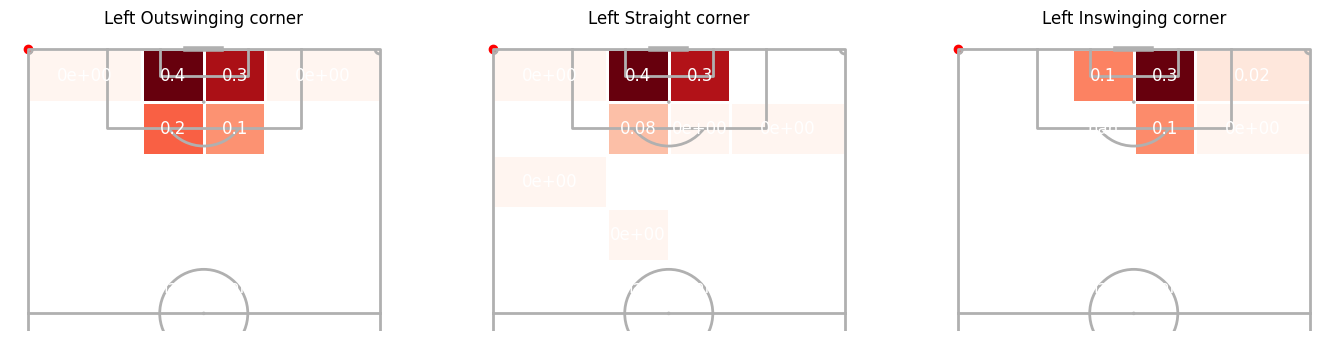

In [ ]:
# figure parameters
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', half=True, corner_arcs=True)

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=11)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom + 4 , pitch.dim.six_yard_bottom-10,
                          pitch.dim.six_yard_top - 4, pitch.dim.top]))

# plot left corners

for i, technique in zip([0,1,2], ['Outswinging', 'Straight', 'Inswinging']):

  x,y=[],[]

  for loc in corner_dangerous_locations['pass_end_location'][(corner_dangerous_locations['location_y'] == 0.1) & (corner_dangerous_locations['pass_technique']==technique)]:

      x.append(loc[0])
      y.append(loc[1])

  positive_corners = corner_dangerous_locations['positive_corner'][(corner_dangerous_locations['location_y'] == 0.1) & (corner_dangerous_locations['pass_technique']==technique)].tolist()
  bin_statistic = pitch.bin_statistic(x, y, values=positive_corners, statistic=corner_score,
                                      bins=(bin_x, bin_y))

  pitch.draw(ax=axs[i])
  axs[i].set_title('Left ' + technique + ' corner')
  pitch.heatmap(bin_statistic, ax=axs[i], cmap='Reds', edgecolor='white')
  pitch.scatter(120, 0.1, color='red', ax=axs[i])
  labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=12,
                              ax=axs[i], ha='center', va='center',
                              str_format='{:.0}')

###Corners from the right

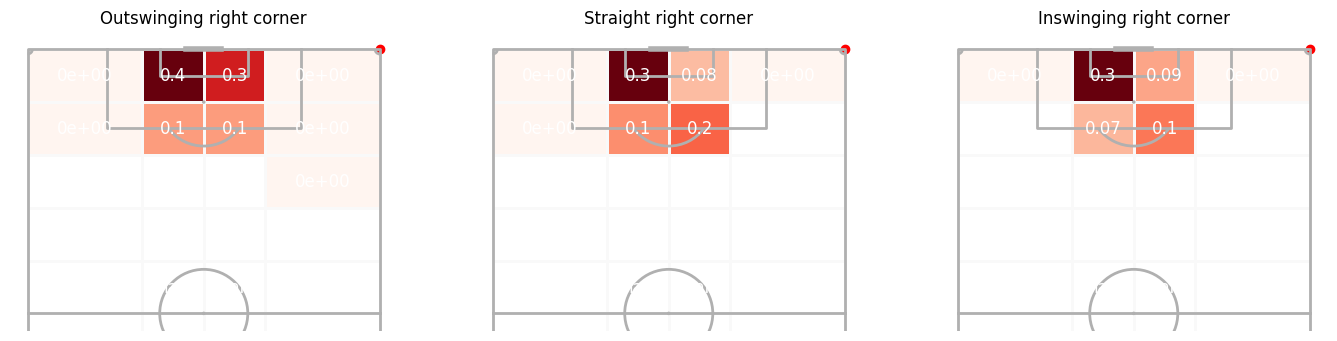

In [ ]:
# figure parameters
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', half=True, corner_arcs=True)#'#f4edf0'

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=11)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom + 4 , pitch.dim.six_yard_bottom-10,
                          pitch.dim.six_yard_top - 4, pitch.dim.top]))

# plot right corners

for i, technique in zip([0,1,2], ['Outswinging', 'Straight', 'Inswinging']):

  x,y=[],[]

  for loc in corner_dangerous_locations['pass_end_location'][(corner_dangerous_locations['location_y'] == 80) & (corner_dangerous_locations['pass_technique']==technique)]:

      x.append(loc[0])
      y.append(loc[1])


  positive_corners = corner_dangerous_locations['positive_corner'][(corner_dangerous_locations['location_y'] == 80) & (corner_dangerous_locations['pass_technique']==technique)].tolist()
  bin_statistic = pitch.bin_statistic(x, y, values=positive_corners, statistic=corner_score,
                                      bins=(bin_x, bin_y))

  pitch.draw(ax=axs[i])
  axs[i].set_title(technique + ' right corner')
  pitch.heatmap(bin_statistic, ax=axs[i], cmap='Reds', edgecolor='#f9f9f9')
  pitch.scatter(120, 80, color='red', ax=axs[i])
  labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=12,
                              ax=axs[i], ha='center', va='center',
                              str_format='{:.0}')

##Corner kick session proposal

I propose now a corner kick session based on the analysis carried out.  

I propose a corner kick for each of the six situations analysed.  It's up to the players and the coaching staff to decide how to distribute these corners during the game, which ones to repeat, ... .
To structure each proposed corner, I adopt the following ideas:
- The corner kick is directed to the area that presented the highest vulnerability score.
- The 2 players identified in the analysis as the most dangerous are placed in the area where the corner is directed (highest vulnearibility score). Another player, among the other ones identified as dangerous in the analysis, is placed in the area with the second highest vulnerability score, in case the corner does not go where planned or there's a duel or other situations. To identify the second highest, areas further from goal are considered as one and in case of draw are preferred to areas closer to goal, to diversify more the positioning of players.
- The players who are placed in a particular area are the players who are supposed to attack that area, how they should do so in order to arrive in the best condition to hit the ball, if statically, with a run, a block, ... this is up to the coaching staff.
- The corner kickers for outswinging and inswinging situations will be those identified as the best in the corresponding analysis. For straight corners, since the cardinality of these cases is much lower, I suggest using both the outswinging and inswinging taker of the corresponding side as possible takers. Another idea would be to always have two possible takers on the ball and to call a scheme before the kick to tell the people in the box where to go, but that's also up to the coaching staff.

Suggested corner kicks are shown below.


###Corners from the left

In [ ]:
# function to draw the corner kick curve
def bezier_curve(p0, p1, p2, t):
    return (1 - t) ** 2 * p0 + 2 * (1 - t) * t * p1 + t ** 2 * p2

Text(-3, 115, 'C.Kelly')

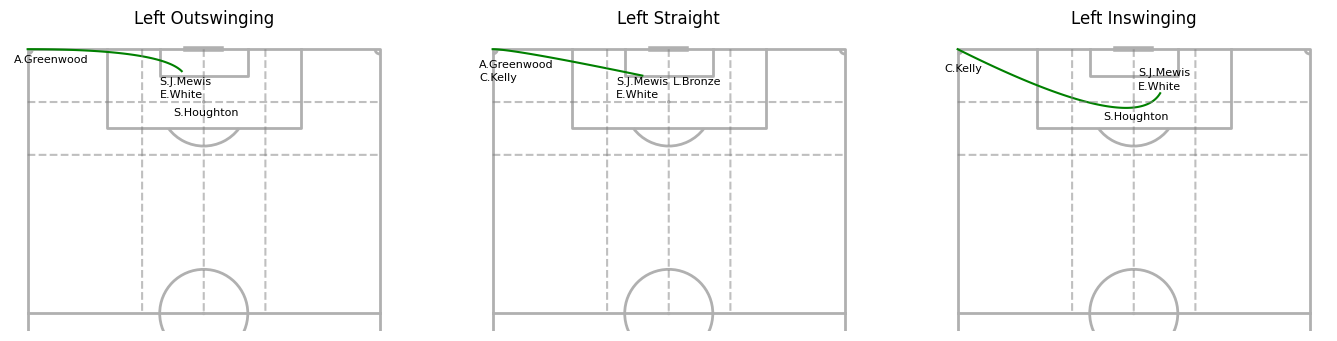

In [ ]:
# figure parameters
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', half=True, corner_arcs=True)#'#f4edf0'

# outswinging
pitch.draw(ax=axs[0])

axs[0].set_title('Left Outswinging')
# Define the corner curve parameters
start_point = np.array([120, 0])
end_point = np.array([115, pitch.dim.six_yard_bottom - 15])

control_point = np.array([120, 30]) #outswinging

t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(start_point, control_point, end_point, t) for t in t_values])

# plot the corner  curve
pitch.plot(curve_points[:, 0], curve_points[:, 1], color='green', ax=axs[0])

# plot the pitch grid
pitch.lines(120, pitch.dim.six_yard_bottom + 4, 60, pitch.dim.six_yard_bottom + 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(120, pitch.dim.six_yard_bottom - 10, 60, pitch.dim.six_yard_bottom - 10, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(120, pitch.dim.six_yard_top - 4, 60, pitch.dim.six_yard_top - 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(108, 0, 108, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(96, 0, 96, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])

# annotate player's names in the box
pitch.annotate(text='E.White', xy=(109, pitch.dim.six_yard_bottom - 20), fontsize=8, ax=axs[0])
pitch.annotate(text='S.J.Mewis', xy=(112, pitch.dim.six_yard_bottom - 20), fontsize=8, ax=axs[0])
pitch.annotate(text='S.Houghton', xy=(105, pitch.dim.six_yard_bottom - 17), fontsize=8, ax=axs[0])

# annotatet player's names in the corners
pitch.annotate(text='A.Greenwood', xy=(117, -3), fontsize=8, ax=axs[0])


# straight
pitch.draw(ax=axs[1])

axs[1].set_title('Left Straight')
# Define the corner curve parameters
start_point = np.array([120, 0])
end_point = np.array([114, pitch.dim.six_yard_bottom - 16])

control_point = np.array([120, 5])

t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(start_point, control_point, end_point, t) for t in t_values])

# plot the corner  curve
pitch.plot(curve_points[:, 0], curve_points[:, 1], color='green', ax=axs[1])

# plot the pitch grid
pitch.lines(120, pitch.dim.six_yard_bottom + 4, 60, pitch.dim.six_yard_bottom + 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(120, pitch.dim.six_yard_bottom - 10, 60, pitch.dim.six_yard_bottom - 10, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(120, pitch.dim.six_yard_top - 4, 60, pitch.dim.six_yard_top - 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(108, 0, 108, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(96, 0, 96, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])

# annotate player's names in the box
pitch.annotate(text='E.White', xy=(109, pitch.dim.six_yard_bottom - 22), fontsize=8, ax=axs[1])
pitch.annotate(text='S.J.Mewis', xy=(112, pitch.dim.six_yard_bottom - 22), fontsize=8, ax=axs[1])
pitch.annotate(text='L.Bronze', xy=(112, pitch.dim.six_yard_bottom - 9), fontsize=8, ax=axs[1])

# annotatet player's names in the corners
pitch.annotate(text='A.Greenwood', xy=(116, -3), fontsize=8, ax=axs[1])
pitch.annotate(text='C.Kelly', xy=(113, -3), fontsize=8, ax=axs[1])


# inswinging
pitch.draw(ax=axs[2])

axs[2].set_title('Left Inswinging')
# Define the corner curve parameters
start_point = np.array([120, 0])
end_point = np.array([110, pitch.dim.six_yard_top + 16])

control_point = np.array([100, 40]) #inswinging

t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(start_point, control_point, end_point, t) for t in t_values])

# plot the corner  curve
pitch.plot(curve_points[:, 0], curve_points[:, 1], color='green', ax=axs[2])

# plot the pitch grid
pitch.lines(120, pitch.dim.six_yard_bottom + 4, 60, pitch.dim.six_yard_bottom + 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(120, pitch.dim.six_yard_bottom - 10, 60, pitch.dim.six_yard_bottom - 10, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(120, pitch.dim.six_yard_top - 4, 60, pitch.dim.six_yard_top - 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(108, 0, 108, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(96, 0, 96, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])

# annotate player's names in the box
pitch.annotate(text='S.J.Mewis', xy=(114, pitch.dim.six_yard_bottom - 9), fontsize=8, ax=axs[2])
pitch.annotate(text='E.White', xy=(111, pitch.dim.six_yard_bottom - 9), fontsize=8, ax=axs[2])
pitch.annotate(text='S.Houghton', xy=(104, pitch.dim.six_yard_bottom - 17), fontsize=8, ax=axs[2])

# annotatet player's names in the corners
pitch.annotate(text='C.Kelly', xy=(115, -3), fontsize=8, ax=axs[2])

###Corners from the right

Text(80, 117, 'C.Weir')

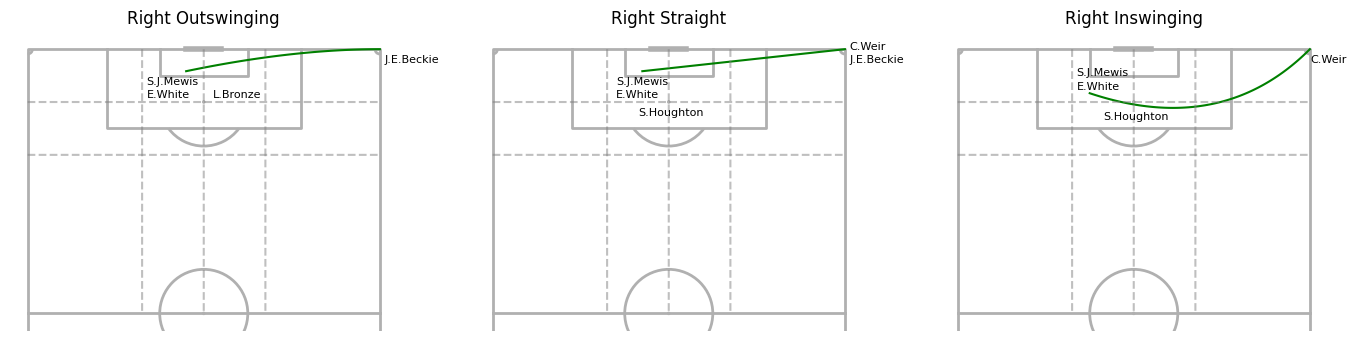

In [ ]:
# figure parameters
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', half=True, corner_arcs=True)#'#f4edf0'

# outswinging
pitch.draw(ax=axs[0])

axs[0].set_title('Right Outswinging')
# Define the corner curve parameters
start_point = np.array([120, 80])
end_point = np.array([115, pitch.dim.six_yard_bottom - 14])

control_point = np.array([120, 60]) #outswinging

t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(start_point, control_point, end_point, t) for t in t_values])

# plot the corner  curve
pitch.plot(curve_points[:, 0], curve_points[:, 1], color='green', ax=axs[0])

# plot the pitch grid
pitch.lines(120, pitch.dim.six_yard_bottom + 4, 60, pitch.dim.six_yard_bottom + 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(120, pitch.dim.six_yard_bottom - 10, 60, pitch.dim.six_yard_bottom - 10, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(120, pitch.dim.six_yard_top - 4, 60, pitch.dim.six_yard_top - 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(108, 0, 108, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])
pitch.lines(96, 0, 96, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[0])

# annotate player's names in the box
pitch.annotate(text='S.J.Mewis', xy=(112, pitch.dim.six_yard_bottom - 23), fontsize=8, ax=axs[0])
pitch.annotate(text='E.White', xy=(109, pitch.dim.six_yard_bottom - 23), fontsize=8, ax=axs[0])
pitch.annotate(text='L.Bronze', xy=(109, pitch.dim.six_yard_bottom - 8), fontsize=8, ax=axs[0])

# annotatet player's names in the corners
pitch.annotate(text='J.E.Beckie', xy=(117, 81), fontsize=8, ax=axs[0])


# straight
pitch.draw(ax=axs[1])

axs[1].set_title('Right Straight')
# Define the corner curve parameters
start_point = np.array([120, 80])
end_point = np.array([115, pitch.dim.six_yard_bottom - 16])

control_point = np.array([120, 80]) #straight

t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(start_point, control_point, end_point, t) for t in t_values])

# plot the corner  curve
pitch.plot(curve_points[:, 0], curve_points[:, 1], color='green', ax=axs[1])

# plot the pitch grid
pitch.lines(120, pitch.dim.six_yard_bottom + 4, 60, pitch.dim.six_yard_bottom + 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(120, pitch.dim.six_yard_bottom - 10, 60, pitch.dim.six_yard_bottom - 10, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(120, pitch.dim.six_yard_top - 4, 60, pitch.dim.six_yard_top - 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(108, 0, 108, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])
pitch.lines(96, 0, 96, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[1])

# annotate player's names in the box
pitch.annotate(text='E.White', xy=(109, pitch.dim.six_yard_bottom - 22), fontsize=8, ax=axs[1])
pitch.annotate(text='S.J.Mewis', xy=(112, pitch.dim.six_yard_bottom - 22), fontsize=8, ax=axs[1])
pitch.annotate(text='S.Houghton', xy=(105, pitch.dim.six_yard_bottom - 17), fontsize=8, ax=axs[1])

# annotatet player's names in the corners
pitch.annotate(text='J.E.Beckie', xy=(117, 81), fontsize=8, ax=axs[1])
pitch.annotate(text='C.Weir', xy=(120, 81), fontsize=8, ax=axs[1])


# inswinging
pitch.draw(ax=axs[2])

axs[2].set_title('Right Inswinging')
# Define the corner curve parameters
start_point = np.array([120, 80])
end_point = np.array([110, pitch.dim.six_yard_top])

control_point = np.array([100, 60]) #inswinging

t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(start_point, control_point, end_point, t) for t in t_values])

# plot the corner  curve
pitch.plot(curve_points[:, 0], curve_points[:, 1], color='green', ax=axs[2])

# plot the pitch grid
pitch.lines(120, pitch.dim.six_yard_bottom + 4, 60, pitch.dim.six_yard_bottom + 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(120, pitch.dim.six_yard_bottom - 10, 60, pitch.dim.six_yard_bottom - 10, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(120, pitch.dim.six_yard_top - 4, 60, pitch.dim.six_yard_top - 4, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(108, 0, 108, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])
pitch.lines(96, 0, 96, 80, linestyle='--', lw=1.5, color='grey', alpha=0.5, ax=axs[2])

# annotate player's names in the box
pitch.annotate(text='S.J.Mewis', xy=(114, pitch.dim.six_yard_bottom - 23), fontsize=8, ax=axs[2])
pitch.annotate(text='E.White', xy=(111, pitch.dim.six_yard_bottom - 23), fontsize=8, ax=axs[2])
pitch.annotate(text='S.Houghton', xy=(104, pitch.dim.six_yard_bottom - 17), fontsize=8, ax=axs[2])

# annotatet player's names in the corners
pitch.annotate(text='C.Weir', xy=(117, 80), fontsize=8, ax=axs[2])

#Assignment 2
The data could be used also for analysing defensive corners. In this case, I would focus on Chelsea's attacking corners to identify their strengths, using the same procedure used before for Manchester City to obtain the data; and on strengths and weaknesses of Manchester City's defensive corners identified by the data, obtained using the same strategy used for Chelsea before.

Then I would propose a strategy based on the information derived from the data, such as, for example:
1. Placing Manchester City's best defenders (e.g. those with more clearances) to mark Chelsea's best attackers (e.g. those with more shots).
2. Placing more defenders in the areas where Chelsea tend to be more dangerous (e.g. has a higher shots / attempts ratio).
3. ...